In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
  df = pd.read_csv('/content/Housing.xls')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.shape

(545, 13)

In [7]:
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for linear regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1754318687330.669
R-squared: 0.6529242642153175


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement

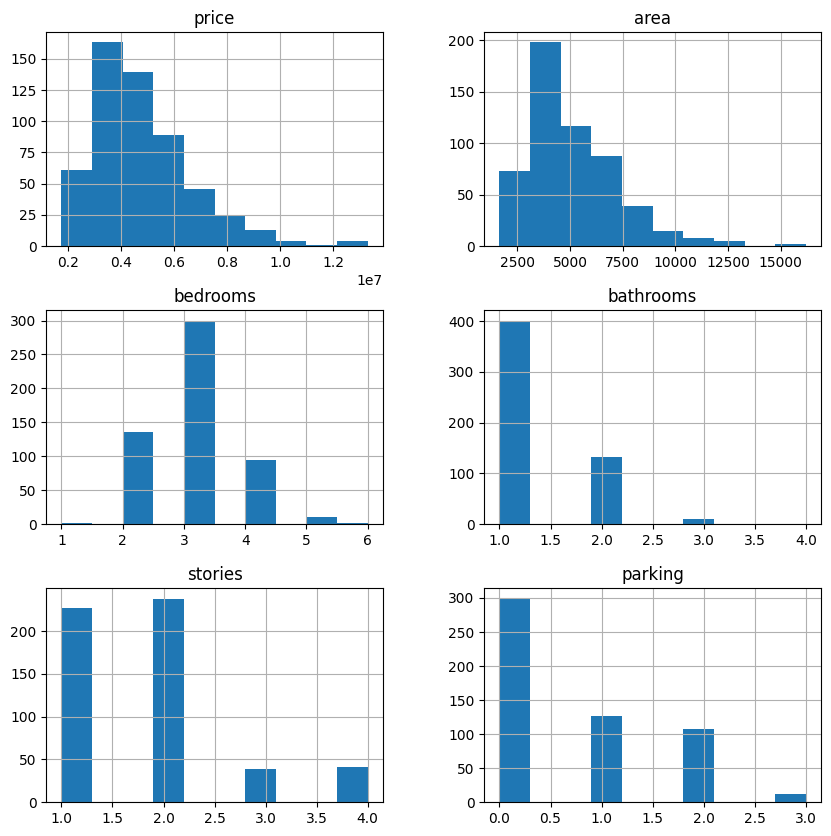

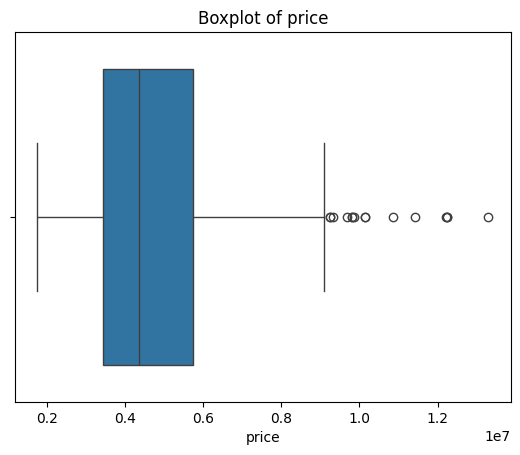

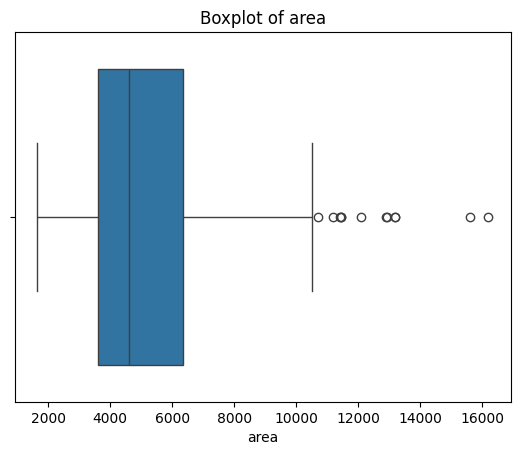

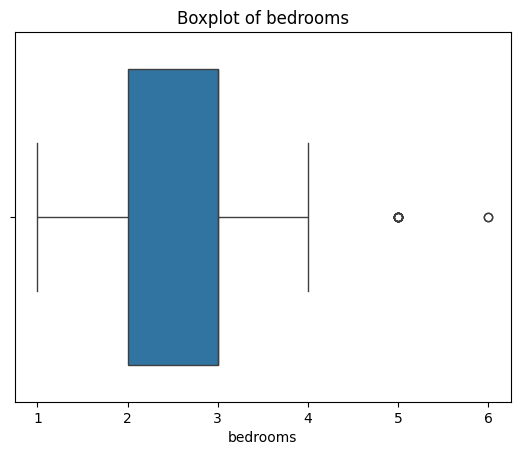

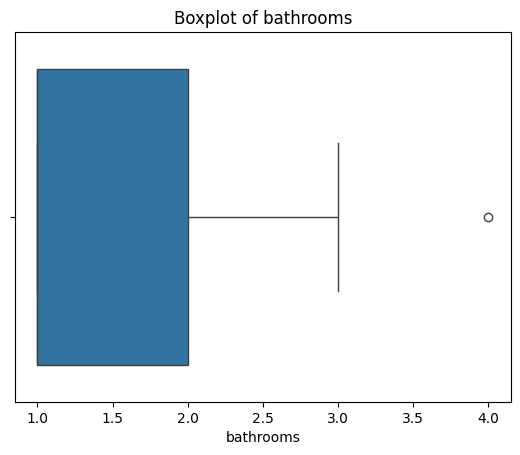

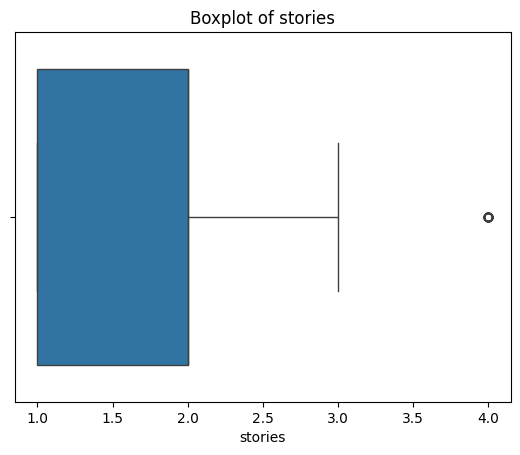

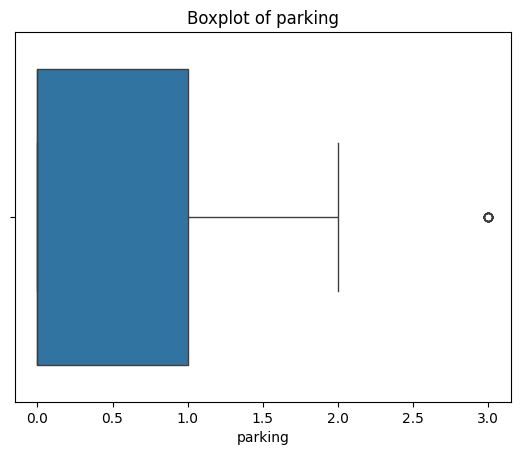

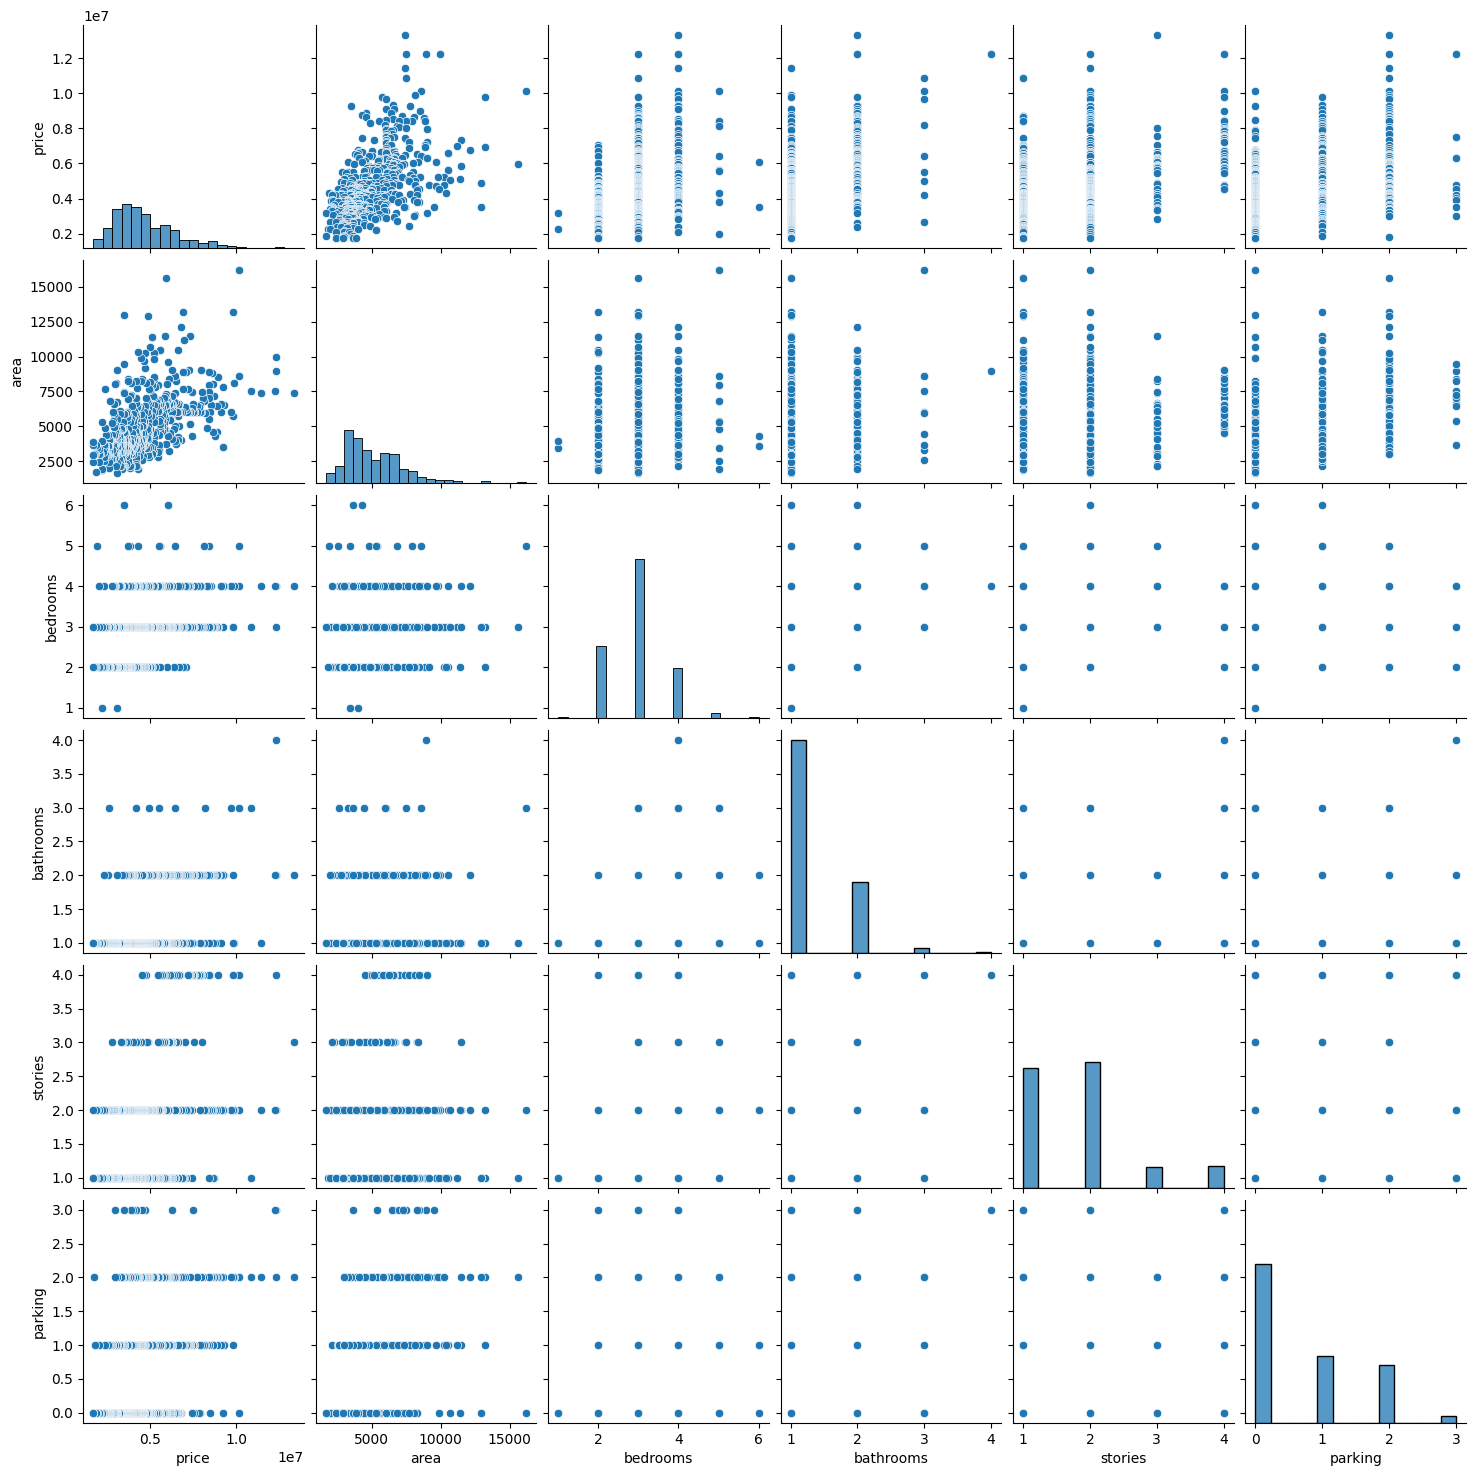


Value counts for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64


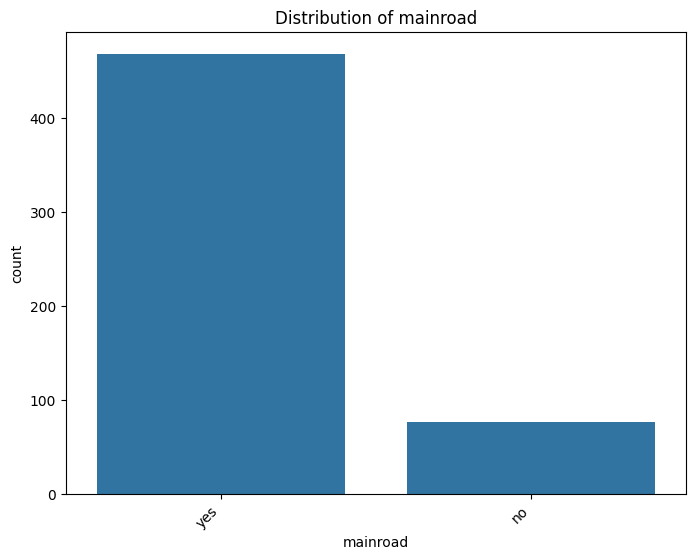


Value counts for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64


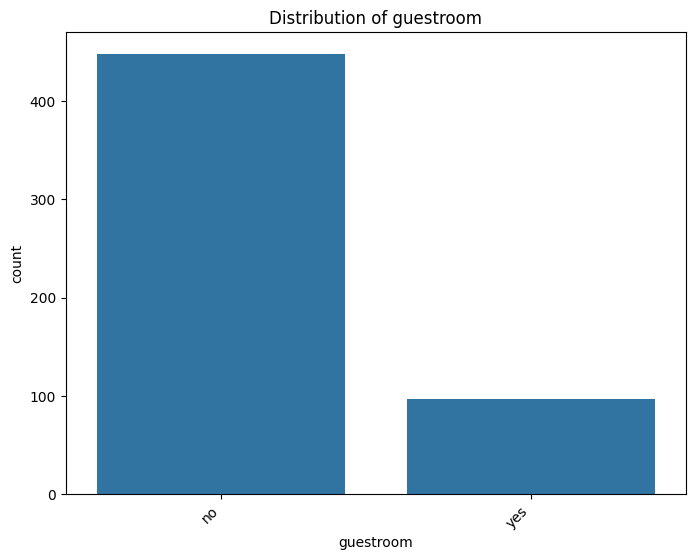


Value counts for basement:
basement
no     354
yes    191
Name: count, dtype: int64


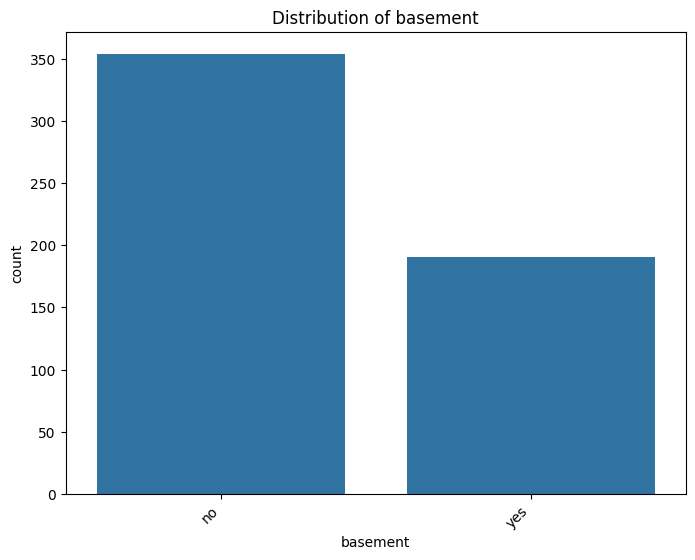


Value counts for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64


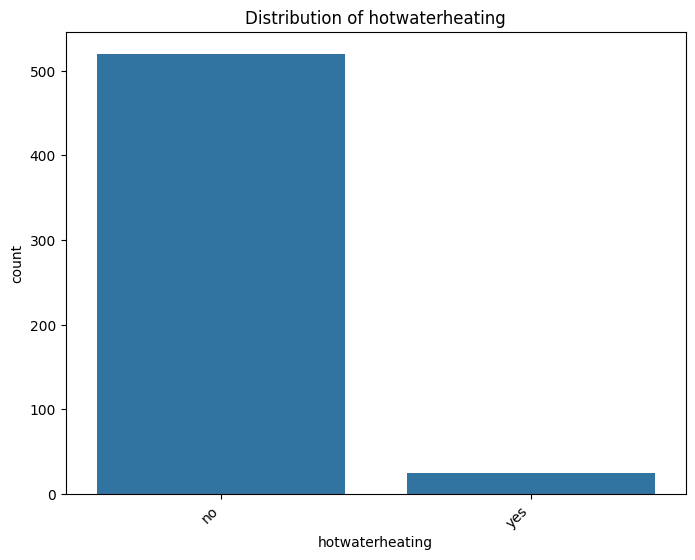


Value counts for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64


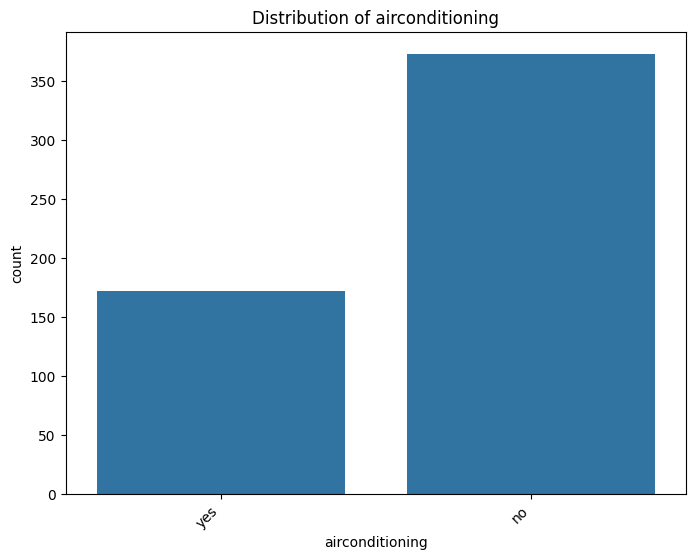


Value counts for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64


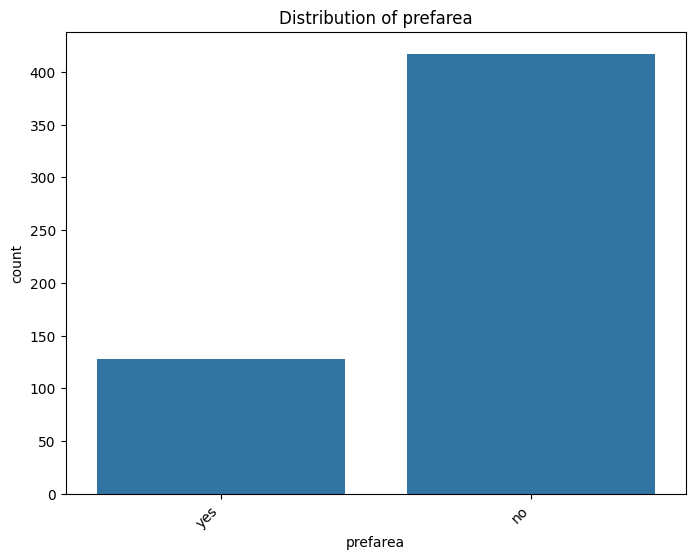


Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


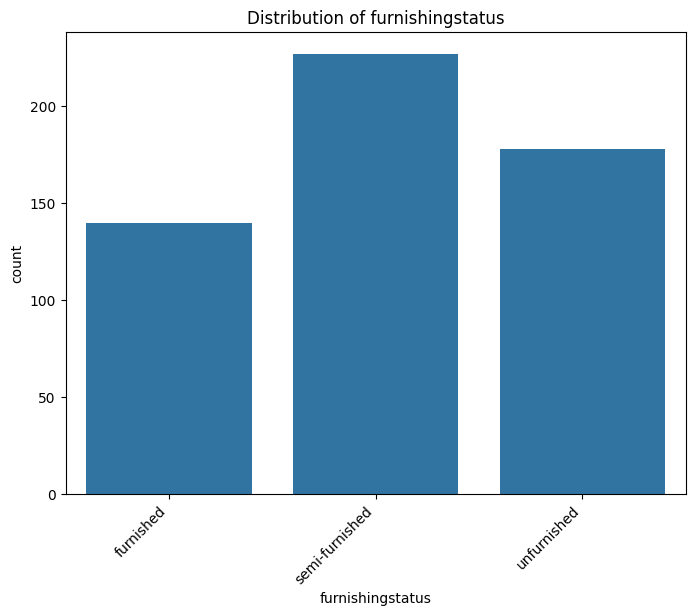

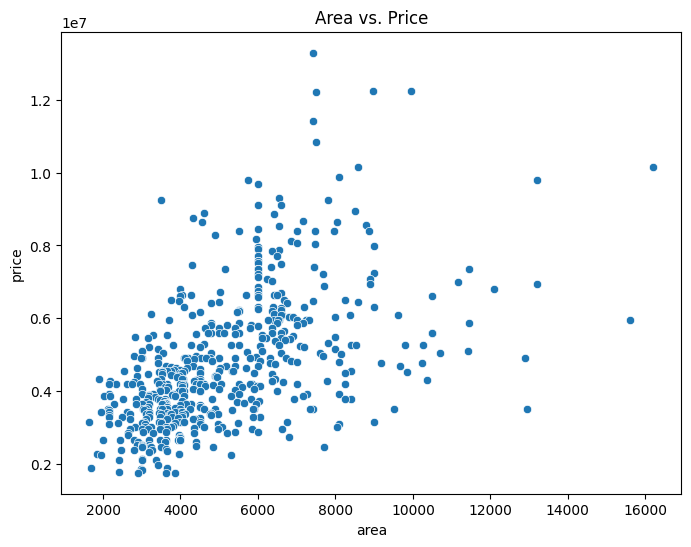

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in your previous code
# df = pd.read_csv('/content/Housing.xls')

# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data Visualization

# Histograms for numerical features
df.hist(figsize=(10, 10))
plt.show()

# Boxplots for numerical features to detect outliers
for col in df.select_dtypes(include=np.number):
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Pairplots for relationships between numerical features
sns.pairplot(df)
plt.show()


# Explore categorical features (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Example: Analyze the relationship between 'area' and 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs. Price')
plt.show()


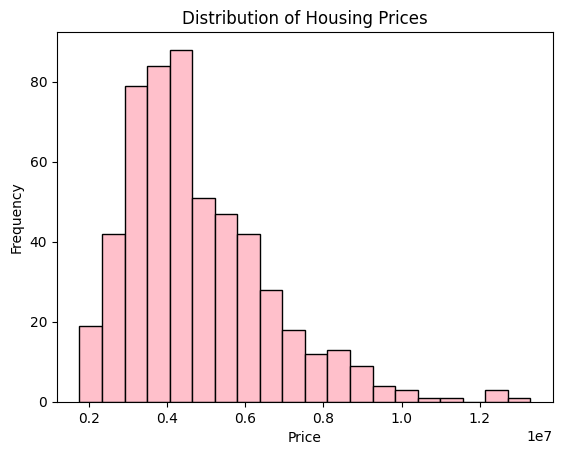

In [14]:
plt.hist(df['price'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/Housing.xls')

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Random Forest): {mse}")
print(f"R-squared (Random Forest): {r2}")


Mean Squared Error (Random Forest): 1971006449235.8137
R-squared (Random Forest): 0.610054593532394


In [16]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Regressor model
svr_model = SVR(kernel='linear') # You can try different kernels ('rbf', 'poly', etc.)
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Support Vector Regression): {mse}")
print(f"R-squared (Support Vector Regression): {r2}")


Mean Squared Error (Support Vector Regression): 5564793029837.756
R-squared (Support Vector Regression): -0.10094286133336094


                                    mse        r2
Linear Regression          5.564793e+12 -0.100943
Random Forest              5.564793e+12 -0.100943
Support Vector Regression  5.564793e+12 -0.100943


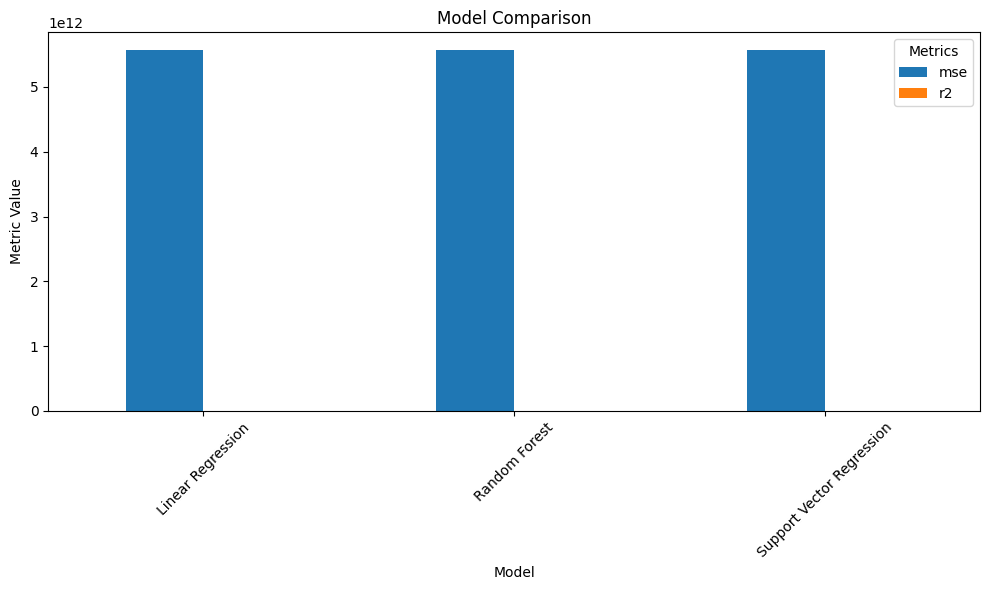

In [17]:
models = {
    "Linear Regression": {"mse": mse, "r2": r2}, # from your linear regression code
    "Random Forest": {"mse": mse, "r2": r2}, # from your random forest code
    "Support Vector Regression": {"mse": mse, "r2": r2} # from your SVR code
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(models).T

# Display the comparison table
print(comparison_df)


# Visualization
comparison_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


In [18]:
from joblib import dump, load

# Assuming 'rf_model' is your trained RandomForestRegressor model
# ... (Your existing code to train the model) ...

# Save the trained model to a file
dump(rf_model, 'random_forest_model.joblib')

# Later, to load the model:
# loaded_rf_model = load('random_forest_model.joblib')


['random_forest_model.joblib']